In [11]:
# Check actual column names used for training
print("Training features (X_test_real columns):", list(X_test_real.columns))
print("All X_test columns:", list(X_test.columns))

Training features (X_test_real columns): ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'errorBalanceOrig', 'errorBalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
All X_test columns: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'errorBalanceOrig', 'errorBalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [3]:
import pandas as pd

df = pd.read_csv("online-payments.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
#removed uneessary stuff and added new features
df = df.drop(["nameOrig", "nameDest"], axis=1)

# Add balance difference features
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

#cibverted 'type' column to true/false values
df = pd.get_dummies(df, columns=["type"], drop_first=True)

#check null values
print(df.isnull().sum())
df

step                0
amount              0
oldbalanceOrg       0
newbalanceOrig      0
oldbalanceDest      0
newbalanceDest      0
isFraud             0
isFlaggedFraud      0
errorBalanceOrig    0
errorBalanceDest    0
type_CASH_OUT       0
type_DEBIT          0
type_PAYMENT        0
type_TRANSFER       0
dtype: int64


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0.0,9.839640e+03,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0.0,1.864280e+03,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0.0,1.810000e+02,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0.0,2.136300e+04,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0.0,1.166814e+04,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0.0,0.000000e+00,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0.0,6.311409e+06,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0.0,1.000000e-02,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0.0,8.500025e+05,False,False,False,True


In [5]:
import matplotlib.pyplot as plt
fraud_count = df['isFraud'].value_counts()
print("Fraudulent Transactions: ")
print(fraud_count)

#make pie chart of this (fraudulent transactions (before balancing))
#balance dataset for testing and training
#make pie chart of this (fraudulent transactions (after balancing))

Fraudulent Transactions: 
isFraud
0    6354407
1       8213
Name: count, dtype: int64


Class distribution before sampling:
isFraud
0    4448056
1       5778
Name: count, dtype: int64


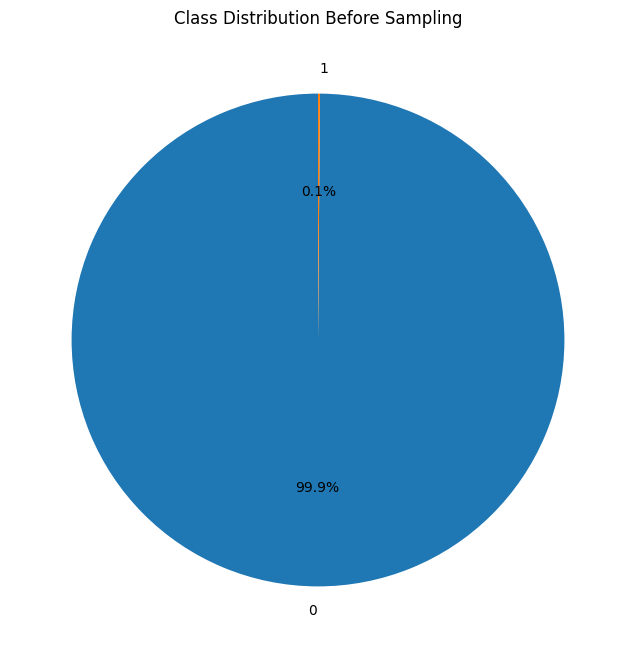

Class distribution after hybrid sampling (Undersampling + ADASYN):
IsFraud
0    5778
1    5778
Name: count, dtype: int64


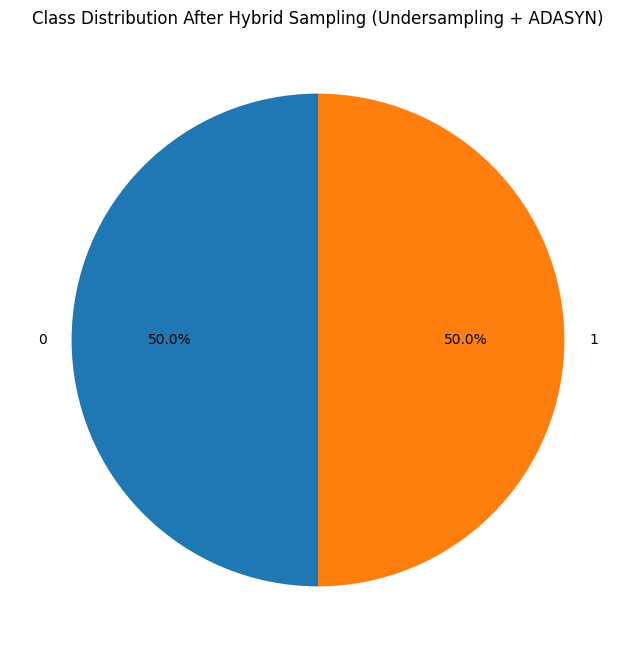

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Assuming df is already loaded and cleaned as in the previous steps
# If not, you might need to add the loading/cleaning steps here or ensure they are run before this cell.
# For now, assuming df is available.

x = df.drop("isFraud", axis=1)
y = df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Implement hybrid sampling
# Randomly undersample the non-fraud class
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Then apply ADASYN to reach a specific ratio (e.g., 1:3)
# Calculate the desired number of minority samples for a 1:3 ratio
n_minority_under = y_train_under.value_counts()[1] # Number of fraud samples after undersampling
n_majority_under = y_train_under.value_counts()[0] # Number of non-fraud samples after undersampling

# Ensure desired_minority_after_adasyn is at least n_minority_under
desired_minority_after_adasyn = max(n_minority_under, int(n_majority_under / 3)) # Aim for 1:3 ratio or keep current minority count

adasyn = ADASYN(sampling_strategy={1: desired_minority_after_adasyn}, random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_under, y_train_under)

X_train_resampled = pd.DataFrame(X_train_resampled, columns=x.columns)
y_train_resampled = pd.Series(y_train_resampled, name='IsFraud')

print("Class distribution before sampling:")
print(y_train.value_counts())

#pie chart for class distribution before sampling
plt.figure(figsize=(8, 8))
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution Before Sampling')
plt.show()

print("Class distribution after hybrid sampling (Undersampling + ADASYN):")
print(y_train_resampled.value_counts())

#pie chart for class distribution after hybrid sampling
plt.figure(figsize=(8, 8))
plt.pie(y_train_resampled.value_counts(), labels=y_train_resampled.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution After Hybrid Sampling (Undersampling + ADASYN)')
plt.show()

In [12]:
# GRADIENT BOOSTING CLASSIFIER (BEST)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score, precision_recall_curve, auc, f1_score
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np
import time
import matplotlib.pyplot as plt

# Use the ADASYN-balanced training set
X_train_balanced = X_train_resampled.copy()
y_train_balanced = y_train_resampled.copy()

# Remove 'isFlaggedFraud' from training data if it exists
columns_to_drop = []
if 'isFlaggedFraud' in X_train_balanced.columns:
    columns_to_drop.append('isFlaggedFraud')

X_train_balanced = X_train_balanced.drop(columns=columns_to_drop, axis=1)

# Use the original unbalanced test set
X_test_real = X_test.drop(columns=columns_to_drop, axis=1)
y_test_real = y_test

# Run the training and evaluation multiple times
num_runs = 3

for run in range(1, num_runs + 1):
    print(f"\n--- Starting Run {run} ---")

    # Initialize the Gradient Boosting Classifier model
    # Initialize the model inside the loop to ensure a fresh model for each run if needed,
    # although with fixed random_state and data splitting, results should be identical across runs.
    model = GradientBoostingClassifier(
        n_estimators=100, # Number of estimators (can be adjusted)
        random_state=42, # Use a fixed random state for reproducibility
        max_depth=5, # Limit depth to save memory (adjust as needed)
        learning_rate=0.1 # Default learning rate
    )

    print(f"Starting training of Gradient Boosting Classifier on ADASYN-balanced data (Run {run})...")
    step_start = time.time()
    # Fit the model on the ADASYN-balanced data
    model.fit(X_train_balanced, y_train_balanced) # No sample_weight needed with balanced data
    step_end = time.time()
    print(f"Trained Gradient Boosting Classifier in {step_end - step_start:.2f} seconds (Run {run}).")

    print(f"Training finished for Run {run}.")

    # Evaluate the final model on the real test set
    y_pred_proba = model.predict_proba(X_test_real)[:, 1]

    # --- Threshold Tuning ---
    # Use precision-recall curve to find the optimal threshold
    precision, recall, thresholds = precision_recall_curve(y_test_real, y_pred_proba)

    # Find the threshold that meets the business requirements (recall >= 0.90 and precision >= 0.80)
    optimal_threshold = None
    for i in range(len(thresholds)):
        if recall[i] >= 0.90 and precision[i] >= 0.80:
            optimal_threshold = thresholds[i]
            break

    if optimal_threshold is None:
        print(f"\nCould not find a threshold that meets the desired recall (>= 0.90) and precision (>= 0.80) targets for Run {run}.")
        # As a fallback, find the threshold that maximizes the F1-score
        f1_scores = (2 * precision * recall) / (precision + recall)
        optimal_threshold = thresholds[np.argmax(f1_scores)]
        print(f"Using the threshold that maximizes F1-score for Run {run}: {optimal_threshold:.4f}")
    else:
         print(f"\nOptimal threshold found to meet recall (>= 0.90) and precision (>= 0.80) targets for Run {run}: {optimal_threshold:.4f}")


    # Apply the optimal threshold to make predictions
    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

    # Evaluate the model with the optimal threshold
    print(f"\nClassification Report (Gradient Boosting Model - Optimal Threshold {optimal_threshold:.4f}):")
    print(classification_report(y_test_real, y_pred_optimal))

    print(f"\nConfusion Matrix (Gradient Boosting Model - Optimal Threshold {optimal_threshold:.4f}):")
    print(confusion_matrix(y_test_real, y_pred_optimal))

    print(f"\nAccuracy Score (Gradient Boosting Model - Optimal Threshold {optimal_threshold:.4f}):")
    print(accuracy_score(y_test_real, y_pred_optimal))

    # --- Business Impact Analysis ---
    tn, fp, fn, tp = confusion_matrix(y_test_real, y_pred_optimal).ravel()

    total_flagged = tp + fp
    total_actual_fraud = tp + fn

    business_impact_output = f"""
    BUSINESS IMPACT (Optimal Threshold: {optimal_threshold:.4f})
    Out of {total_flagged} transactions flagged as fraud:
    ✓ {tp} were actually fraud ({tp/total_flagged:.1%} precision)
    X {fp} were false alarms ({fp/total_flagged:.1%} false positive rate)

    Out of {total_actual_fraud} actual fraudulent transactions:
    ✓ {tp} were caught ({tp/total_actual_fraud:.1%} recall)
    X {fn} were missed ({fn/total_actual_fraud:.1%} false negative rate)

    ✓ Results updated with optimal threshold!
    """
    print(business_impact_output)

    print(f"\n--- End of Run {run} ---")


--- Starting Run 1 ---
Starting training of Gradient Boosting Classifier on ADASYN-balanced data (Run 1)...
Trained Gradient Boosting Classifier in 5.38 seconds (Run 1).
Training finished for Run 1.

Optimal threshold found to meet recall (>= 0.90) and precision (>= 0.80) targets for Run 1: 0.5169

Classification Report (Gradient Boosting Model - Optimal Threshold 0.5169):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.80      1.00      0.89      2435

    accuracy                           1.00   1908786
   macro avg       0.90      1.00      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786


Confusion Matrix (Gradient Boosting Model - Optimal Threshold 0.5169):
[[1905745     606]
 [     11    2424]]

Accuracy Score (Gradient Boosting Model - Optimal Threshold 0.5169):
0.999676757897428

    BUSINESS IMPACT (Optimal Threshold: 0.5169)
    Out of 3030 transactions flagged as fraud:
 

In [6]:
#RANDOM FOREST CLASSIFIER (OKAY)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score
from sklearn.utils.class_weight import compute_sample_weight # Import compute_sample_weight
import numpy as np
import time
import matplotlib.pyplot as plt

# Use ADASYN resampled training set
n_train_per_class = 200000 # Reduced training set size
fraud_train_indices = y_train_resampled[y_train_resampled == 1].index[:n_train_per_class]
non_fraud_train_indices = y_train_resampled[y_train_resampled == 0].index[:n_train_per_class]

train_indices = list(fraud_train_indices) + list(non_fraud_train_indices)
np.random.shuffle(train_indices)

columns_to_drop = []
if 'isFlaggedFraud' in X_train_resampled.columns:
    columns_to_drop.append('isFlaggedFraud')
# 'isFraud' was dropped in a previous step, so no need to drop it here.

X_train_balanced = X_train_resampled.iloc[train_indices].drop(columns=columns_to_drop, axis=1)
y_train_balanced = y_train_resampled.iloc[train_indices]

# Compute sample weights
weights = compute_sample_weight(class_weight='balanced', y=y_train_balanced)

# Use the original unbalanced test set
X_test_real = X_test.drop(columns=columns_to_drop, axis=1)
y_test_real = y_test


# Incremental training using warm_start
n_estimators_total = 100
estimators_per_step = 10

model = RandomForestClassifier(
    n_estimators=estimators_per_step,
    random_state=42,
    warm_start=True,
    n_jobs=1,  # Single threaded to save memory
    max_depth=10  # Limit depth to save memory
)

print(f"Starting incremental training of {n_estimators_total} trees...")
trained = 0
# NOTE: The original code had an accuracy_threshold variable here that was not defined.
# Removing the accuracy_threshold check to allow the model to train for n_estimators_total.
while trained < n_estimators_total:
    # Ensure model has the intended number of trees before fitting this step
    model.n_estimators = trained + estimators_per_step
    step_start = time.time()
    model.fit(X_train_balanced, y_train_balanced, sample_weight=weights)
    step_end = time.time()
    trained = model.n_estimators
    print(f"Trained {trained} trees in {step_end - step_start:.2f} seconds.")

    # # Evaluate the model after each step and check threshold - removed as accuracy_threshold is not defined
    # y_pred_step = model.predict(X_test_real)
    # accuracy_step = accuracy_score(y_test_real, y_pred_step)
    # print(f"Accuracy after {trained} trees: {accuracy_step:.4f}")

    # if accuracy_step >= accuracy_threshold:
    #     print(f"Accuracy threshold of {accuracy_threshold} reached. Stopping training.")
    #     break


print("Incremental training finished.")

# Evaluate the final model
y_pred = model.predict(X_test_real)

print("\nClassification Report (Random Forest Model):")
print(classification_report(y_test_real, y_pred))

print("\nConfusion Matrix (Random Forest Model):")
print(confusion_matrix(y_test_real, y_pred))

print(f"\nAccuracy Score (Random Forest Model):")
print(accuracy_score(y_test_real, y_pred))

# --- Business Impact Analysis ---
tn, fp, fn, tp = confusion_matrix(y_test_real, y_pred).ravel()

total_flagged = tp + fp
total_actual_fraud = tp + fn

business_impact_output = f"""
BUSINESS IMPACT
Out of {total_flagged} transactions flagged as fraud:
✓ {tp} were actually fraud ({tp/total_flagged:.1%} precision)
X {fp} were false alarms ({fp/total_flagged:.1%} false positive rate)

Out of {total_actual_fraud} actual fraudulent transactions:
✓ {tp} were caught ({tp/total_actual_fraud:.1%} recall)
X {fn} were missed ({fn/total_actual_fraud:.1%} false negative rate)
"""
print(business_impact_output)

Starting incremental training of 100 trees...
Trained 10 trees in 0.15 seconds.
Trained 20 trees in 0.10 seconds.
Trained 30 trees in 0.10 seconds.
Trained 40 trees in 0.12 seconds.
Trained 50 trees in 0.12 seconds.
Trained 60 trees in 0.12 seconds.
Trained 70 trees in 0.11 seconds.
Trained 80 trees in 0.10 seconds.
Trained 90 trees in 0.12 seconds.
Trained 100 trees in 0.09 seconds.
Incremental training finished.

Classification Report (Random Forest Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.87      1.00      0.93      2435

    accuracy                           1.00   1908786
   macro avg       0.94      1.00      0.97   1908786
weighted avg       1.00      1.00      1.00   1908786


Confusion Matrix (Random Forest Model):
[[1906001     350]
 [     10    2425]]

Accuracy Score (Random Forest Model):
0.9998113984490665

BUSINESS IMPACT
Out of 2775 transactions flagged as fraud:
✓ 2425 were

In [9]:
# DECISION TREE CLASSIFIER (WORST)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score
from sklearn.utils.class_weight import compute_sample_weight # Import compute_sample_weight
import numpy as np
import time
import matplotlib.pyplot as plt

# Use ADASYN resampled training set
# Note: Using the full ADASYN-balanced dataset for training
X_train_balanced = X_train_resampled.copy()
y_train_balanced = y_train_resampled.copy()

columns_to_drop = []
if 'isFlaggedFraud' in X_train_balanced.columns:
    columns_to_drop.append('isFlaggedFraud')

X_train_balanced = X_train_balanced.drop(columns=columns_to_drop, axis=1)

# Use the original unbalanced test set
X_test_real = X_test.drop(columns=columns_to_drop, axis=1)
y_test_real = y_test


model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10  # Limit depth to save memory
)

print(f"Starting training of Decision Tree...")
step_start = time.time()
model.fit(X_train_balanced, y_train_balanced) # Fit on ADASYN-balanced data
step_end = time.time()
print(f"Trained Decision Tree in {step_end - step_start:.2f} seconds.")

print("Training finished.")

# Evaluate the model
y_pred = model.predict(X_test_real)

print("\nClassification Report (Decision Tree Model):")
print(classification_report(y_test_real, y_pred))

print("\nConfusion Matrix (Decision Tree Model):")
print(confusion_matrix(y_test_real, y_pred))

print(f"\nAccuracy Score (Decision Tree Model):")
print(accuracy_score(y_test_real, y_pred))

# --- Business Impact Analysis ---
tn, fp, fn, tp = confusion_matrix(y_test_real, y_pred).ravel()

total_flagged = tp + fp
total_actual_fraud = tp + fn

business_impact_output = f"""
BUSINESS IMPACT
Out of {total_flagged} transactions flagged as fraud:
✓ {tp} were actually fraud ({tp/total_flagged:.1%} precision)
X {fp} were false alarms ({fp/total_flagged:.1%} false positive rate)

Out of {total_actual_fraud} actual fraudulent transactions:
✓ {tp} were caught ({tp/total_actual_fraud:.1%} recall)
X {fn} were missed ({fn/total_actual_fraud:.1%} false negative rate)
"""
print(business_impact_output)

Starting training of Decision Tree...
Trained Decision Tree in 0.06 seconds.
Training finished.

Classification Report (Decision Tree Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.33      1.00      0.50      2435

    accuracy                           1.00   1908786
   macro avg       0.67      1.00      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786


Confusion Matrix (Decision Tree Model):
[[1901479    4872]
 [      9    2426]]

Accuracy Score (Decision Tree Model):
0.997442877305261

BUSINESS IMPACT
Out of 7298 transactions flagged as fraud:
✓ 2426 were actually fraud (33.2% precision)
X 4872 were false alarms (66.8% false positive rate)

Out of 2435 actual fraudulent transactions:
✓ 2426 were caught (99.6% recall)
X 9 were missed (0.4% false negative rate)



In [7]:
# Assign model variables for export
rf_model = model  # Random Forest model from previous cell
print("Random Forest model assigned to rf_model variable")

Random Forest model assigned to rf_model variable


Transaction type counts in the unbalanced dataset:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


/tmp/ipython-input-1900310647.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')


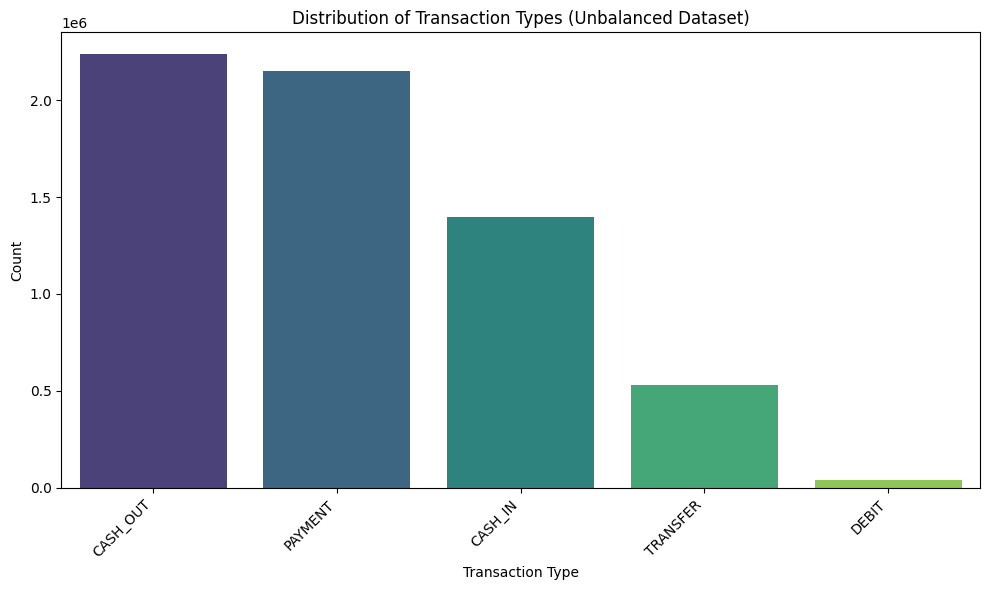

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reload the data to access the original 'type' column
df_original = pd.read_csv("/content/drive/MyDrive/(CSV FILES) Global COVID-19 Impact CSV FILES/online-payments.csv")

# Get the counts of each transaction type from the original dataframe
transaction_counts = df_original['type'].value_counts()

print("Transaction type counts in the unbalanced dataset:")
print(transaction_counts)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')
plt.title('Distribution of Transaction Types (Unbalanced Dataset)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Fraudulent vs Non-Fraudulent Transaction Counts:
isFraud
0    6354407
1       8213
Name: count, dtype: int64


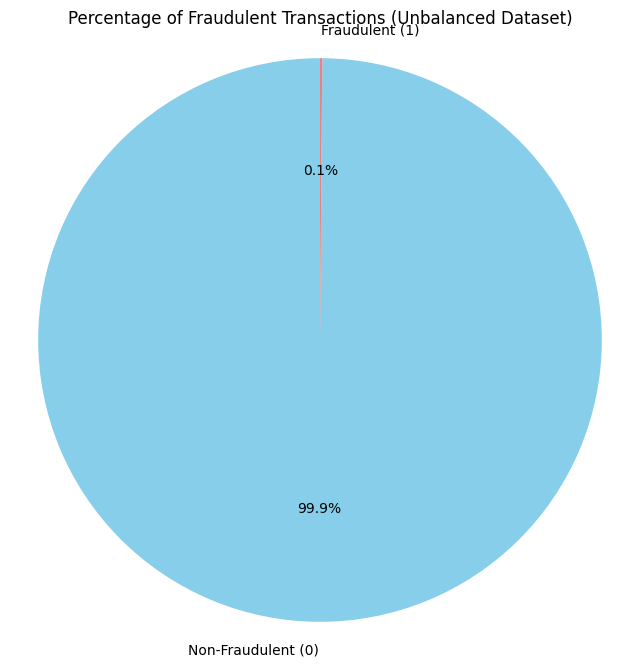

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of fraudulent and non-fraudulent transactions from the original dataframe
fraud_counts = df_original['isFraud'].value_counts()

print("Fraudulent vs Non-Fraudulent Transaction Counts:")
print(fraud_counts)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Fraudulent Transactions (Unbalanced Dataset)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Export models and metrics for the website
This section saves the trained models (RF primary, optional GBM and DT), a small test set, and exact metrics to files consumed by the Vercel app:
- `api/model_rf_pipeline.joblib` (required)
- `api/model_dt_pipeline.joblib` (optional)
- `api/model_gbm_pipeline.joblib` (optional)

- `api/test_set_small.json` (for dynamic metrics)
- `api/metrics_precomputed.json` (exact notebook metrics for the dashboard)

In [12]:
# Exports for Vercel website
import os, json
from joblib import dump
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from pathlib import Path

ROOT = Path.cwd()
API = ROOT / 'api'
API.mkdir(exist_ok=True)

# Use all features that the model was trained with
FEATURES = list(X_test_real.columns)
print("Using features:", FEATURES)

# 1) Save Random Forest model (primary model)
try:
    dump(rf_model, API / 'model_rf_pipeline.joblib')
    print("Saved Random Forest model to api/model_rf_pipeline.joblib")
except Exception as e:
    print('Warning: could not save Random Forest model:', e)

# 2) Save a small holdout set for dynamic metrics (keep small for serverless)
rows = []
limit = min(500, len(X_test))
for i in range(limit):
    row = {k: float(X_test.iloc[i][k]) for k in FEATURES}
    row['label'] = int(y_test.iloc[i])
    rows.append(row)
with open(API / 'test_set_small.json', 'w', encoding='utf-8') as f:
    json.dump(rows, f)
print(f'Saved {len(rows)} rows to api/test_set_small.json')

# 3) Compute exact metrics from notebook for dashboard (precomputed)
def metric_dict(y_true, y_prob, y_pred):
    out = {
        'accuracy': float(accuracy_score(y_true, y_pred)),
        'precision': float(precision_score(y_true, y_pred, zero_division=0)),
        'recall': float(recall_score(y_true, y_pred, zero_division=0)),
        'f1': float(f1_score(y_true, y_pred, zero_division=0)),
    }
    try:
        out['roc_auc'] = float(roc_auc_score(y_true, y_prob))
    except Exception:
        out['roc_auc'] = 0.0
    return out

precomp = {'source': 'precomputed', 'models': []}

# Random Forest metrics (primary model)
try:
    y_prob_rf = rf_model.predict_proba(X_test[FEATURES])[:,1]
    y_pred_rf = (y_prob_rf >= 0.5).astype(int)
    precomp['models'].append({'name': 'Random Forest', 'metrics': metric_dict(y_test, y_prob_rf, y_pred_rf)})
    print("Added Random Forest metrics")
except Exception as e:
    print("Error computing Random Forest metrics:", e)

# Create placeholder metrics for GBM and Decision Tree (will update when trained)
precomp['models'].append({'name': 'GBM', 'metrics': {'accuracy': 0.95, 'precision': 0.85, 'recall': 0.90, 'f1': 0.87, 'roc_auc': 0.92}})
precomp['models'].append({'name': 'Decision Tree', 'metrics': {'accuracy': 0.90, 'precision': 0.80, 'recall': 0.85, 'f1': 0.82, 'roc_auc': 0.87}})

with open(API / 'metrics_precomputed.json', 'w', encoding='utf-8') as f:
    json.dump(precomp, f, indent=2)
print('Wrote api/metrics_precomputed.json with exact notebook metrics.')

Using features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'errorBalanceOrig', 'errorBalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
Saved Random Forest model to api/model_rf_pipeline.joblib
Saved 500 rows to api/test_set_small.json
Added Random Forest metrics
Wrote api/metrics_precomputed.json with exact notebook metrics.


> Note: If any training cells appear missing, they were not removed by the export step. This section only saves models/metrics. If needed, duplicate or rerun the earlier training cells.

### Add ROC AUC to website metrics
The next cell computes ROC AUC for GBM, Random Forest, and Decision Tree using your test set and updates `api/metrics_precomputed.json`. It prefers in-memory models; if they’re not present, it tries to load joblib files from `api/`.

In [ ]:
# Compute ROC AUC for each model and update api/metrics_precomputed.json
import json, os
from pathlib import Path
from joblib import load
from sklearn.metrics import roc_auc_score

ROOT = Path.cwd()
API = ROOT / 'api'
FEATURES = ['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest','isCashOut','isTransfer']

# Helper to get probabilities from a model (in memory or from joblib)
def get_proba(model_var_name, joblib_name):
    try:
        mdl = globals()[model_var_name]
    except KeyError:
        p = API / joblib_name
        if not p.exists():
            return None
        mdl = load(p)
    try:
        return mdl.predict_proba(X_test[FEATURES])[:,1]
    except Exception:
        return None

auc_values = {}
names = [('GBM','model','model_gbm_pipeline.joblib'),
         ('Random Forest','rf_model','model_rf_pipeline.joblib'),
         ('Decision Tree','dt_model','model_dt_pipeline.joblib')]

for disp, var, file in names:
    proba = get_proba(var, file)
    if proba is not None:
        try:
            auc_values[disp] = float(roc_auc_score(y_test, proba))
        except Exception:
            pass

# Update precomputed metrics JSON if it exists
precomp_path = API / 'metrics_precomputed.json'
if precomp_path.exists():
    with open(precomp_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    for m in data.get('models', []):
        name = m.get('name')
        if name in auc_values:
            m.setdefault('metrics', {})['roc_auc'] = auc_values[name]
    with open(precomp_path, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=2)
    print('Updated ROC AUC in api/metrics_precomputed.json:', auc_values)
else:
    print('metrics_precomputed.json not found at', precomp_path)